In [61]:
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np

import os
import glob
import ast
import matplotlib

import numpy as np
from scipy.optimize import curve_fit
import scipy

### Notes:
- for RF05 - check the one with least stdev - measured_rf05_06_N48_blackmeasurement_nosleep RENAMED to rf05
- for 

In [62]:
before_hwp_rf10 = 0.3433878080732969
ratio_darkcount_to_max = 0.8031035331516106

In [63]:
def sine_function(x, A, B, C, D):
    return A * np.sin(B * x + C) + D

In [64]:
def fitter(x,y, p0_amp, label = None ):
    
    p0 = [p0_amp, 2*np.pi/8000, 0, 0]
    params, covariance = curve_fit(sine_function, x, y, p0=p0)

    # Extract the fitted parameters
    A_fit, B_fit, C_fit, D_fit = params

    print(f"{label} - fitted parameters: A={A_fit}, B={B_fit}, C={C_fit}, D={D_fit}")
    # Generate y values using the fitted parameters
    steps = np.arange(min(x), max(x), 100)
    y_fit = sine_function(steps, A_fit, B_fit, C_fit, D_fit)

    return params, steps, y_fit

In [65]:
# measurements folder path
folder_path = "measurements\\measurements_after_HWP_fm2\\"
folder_path = "measurements/measurements_after_HWP_fm2/"

# Get all CSV files in the folder
files_after_hwp = glob.glob(os.path.join(folder_path, "*.csv"))
print(len(files_after_hwp), 'after hwp - amount of meas files (inc. darkcounts)')

# before hwp folder path
folder_path = "analog_data/before_hwp/"
files_before_hwp =  glob.glob(os.path.join(folder_path, "*.csv"))
print(len(files_before_hwp), 'before hwp - amount of meas files (inc. darkcounts)')

# read in darkcounts and delete them from the saved files list
darkcounts = pd.read_csv(files_after_hwp.pop(0))
darkcounts_before = pd.read_csv(files_before_hwp.pop(0), skiprows=2)

33 after hwp - amount of meas files (inc. darkcounts)
34 before hwp - amount of meas files (inc. darkcounts)


In [66]:
# # RF5 !!!!!! not needed anymore - for determining which is the most on point rf05 measurement
# folder_path = 'measurements/measurements_after_HWP_fm2/optimizing_errors_on05/'

# # Get all CSV files in the folder
# files_rf05 = glob.glob(os.path.join(folder_path, "*.csv"))
# print(len(files_rf05), '- different rf5')

# rf5_dict = {}
# # read in darkcounts and delete them from the saved files list

# rf05 = [pd.read_csv(file) for file in files_rf05]

# for i, data in enumerate(rf05):
#     rf = os.path.basename(files_rf05[i]).split('rf')[1].split('.csv')[0] #str for rf 
#     rf = f'rf{rf}'
#     rf5_dict[rf] = data

# vals = np.array([])
# steps = np.array([])
# errors  = np.array([])

# for key in rf5_dict.keys():
#     data = rf5_dict[key]
#     steps =  np.array([int(dat[1:-4]) for dat in data['rotor_step']])
#     vals = np.array(data['averaged']) - darkcount_after_avg
#     errors = np.array(data['stdev'])
#     minpos = steps[np.where(vals < min(vals) + 0.001)]
#     print(key, minpos)
#     plt.axvline(minpos[0])
#     if np.any(minpos == 5500) :
#         print('y')
#         plt.errorbar(steps, y = vals, yerr=errors, label = key, alpha = 0.4)
#     # plt.plot(steps, vals, label = key)
# plt.legend(bbox_to_anchor = (1,1))
# # plt.ylim(0.1)

In [67]:
darkcounts_before_avg = np.average(darkcounts_before[' Measurement'])
print('average darkcount before hwp', darkcounts_before_avg)

average darkcount before hwp 0.007810489861751153


In [68]:
# save all measured rfs into a loaded df -> into a list

all_after = [pd.read_csv(file) for file in files_after_hwp]
all_before = [pd.read_csv(file, skiprows=2) for file in files_before_hwp]

#initiate dicts for saving before avgs
before_hwp_dict = {}
before_hwp_avg = {}
after_hwp_dict = {}

In [69]:
rf10_before = pd.read_csv('measurements\measurements_th100_before_hwp\measured_rf10.csv')
rf10_before = float(rf10_before['averaged'].iloc[0])
print(rf10_before)

0.00210149233885


In [70]:
# after_HWP_Measurements : save into dictionary
for i, data in enumerate(all_after):
    rf = os.path.basename(files_after_hwp[i]).split('rf')[1].split('.csv')[0] #str for rf 
    rf = f'rf{rf}'
    after_hwp_dict[rf] = data
# before_HWP_Measurements : save into Dictionary and another Dictionary for averages
for i, data in enumerate(all_before):

    # get the name
    rf = os.path.basename(files_before_hwp[i]).split('rf_')[1][0:3]
    rf = rf.split('.')[0]
    label = f'rf{rf}'

    before_hwp_dict[label] = data
    before_hwp_avg[label] = np.average(before_hwp_dict[label][' Measurement'])

In [71]:
# a rule for sorting out the loaded measurements according to their names (RFs)
def rfsort(n):
    n = n[2:]
    n = int(n)
    return n
# getting colors for plotting before_HWP data

n_lines = len(before_hwp_avg)
cmap = matplotlib.colormaps['plasma']

# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, n_lines+7))
print('number of colors, for plots of before_HWP Data', len(colors))

number of colors, for plots of before_HWP Data 40


In [72]:
# sorting keys for before_HWP Average Data - so theyre consistent
keys = sorted(before_hwp_avg.keys(), key=rfsort)

print('amount of keys for before_HWP meas.: ', len(keys), '\nkeys: ', keys)

temp_dict = {}
for key in keys:
    if len(key) == 3:
        newkey = 'rf0' + key.split('rf')[1]
        temp_dict[newkey] = before_hwp_avg[key]
    else:
        temp_dict[key] = before_hwp_avg[key]

before_hwp_avg = temp_dict
print('\nkeys after adjusting name length: ', before_hwp_avg.keys())

amount of keys for before_HWP meas.:  33 
keys:  ['rf01', 'rf2', 'rf3', 'rf4', 'rf5', 'rf6', 'rf7', 'rf8', 'rf9', 'rf15', 'rf20', 'rf25', 'rf30', 'rf35', 'rf40', 'rf45', 'rf50', 'rf55', 'rf60', 'rf65', 'rf70', 'rf75', 'rf78', 'rf80', 'rf83', 'rf85', 'rf88', 'rf90', 'rf92', 'rf94', 'rf96', 'rf98', 'rf100']

keys after adjusting name length:  dict_keys(['rf01', 'rf02', 'rf03', 'rf04', 'rf05', 'rf06', 'rf07', 'rf08', 'rf09', 'rf15', 'rf20', 'rf25', 'rf30', 'rf35', 'rf40', 'rf45', 'rf50', 'rf55', 'rf60', 'rf65', 'rf70', 'rf75', 'rf78', 'rf80', 'rf83', 'rf85', 'rf88', 'rf90', 'rf92', 'rf94', 'rf96', 'rf98', 'rf100'])


In [73]:
# sorting keys for before_HWP Data - so theyre consistent
keys = sorted(before_hwp_dict.keys(), key=rfsort)

print('amount of keys for before_HWP meas.: ', len(keys), '\nkeys: ', keys)

temp_dict = {}
for key in keys:
    if len(key) == 3:
        newkey = 'rf0' + key.split('rf')[1]
        temp_dict[newkey] = before_hwp_dict[key]
    else:
        temp_dict[key] = before_hwp_dict[key]

before_hwp_dict = temp_dict
print(f'keys after adjusting name length: {len(keys)} \n', before_hwp_dict.keys())

amount of keys for before_HWP meas.:  33 
keys:  ['rf01', 'rf2', 'rf3', 'rf4', 'rf5', 'rf6', 'rf7', 'rf8', 'rf9', 'rf15', 'rf20', 'rf25', 'rf30', 'rf35', 'rf40', 'rf45', 'rf50', 'rf55', 'rf60', 'rf65', 'rf70', 'rf75', 'rf78', 'rf80', 'rf83', 'rf85', 'rf88', 'rf90', 'rf92', 'rf94', 'rf96', 'rf98', 'rf100']
keys after adjusting name length: 33 
 dict_keys(['rf01', 'rf02', 'rf03', 'rf04', 'rf05', 'rf06', 'rf07', 'rf08', 'rf09', 'rf15', 'rf20', 'rf25', 'rf30', 'rf35', 'rf40', 'rf45', 'rf50', 'rf55', 'rf60', 'rf65', 'rf70', 'rf75', 'rf78', 'rf80', 'rf83', 'rf85', 'rf88', 'rf90', 'rf92', 'rf94', 'rf96', 'rf98', 'rf100'])


In [74]:
ranges = [30e-3, 300e-3, 3, 30, 300]
lsds = [0.01e-3, 0.1e-3, 0.001, 0.01, 0.1]

In [75]:
error = []
for key in before_hwp_dict.keys():
    val = before_hwp_avg[key]
    lsd = 0
    for i, max in enumerate(ranges):
        if val < max:
            lsd = lsds[i]
            break
    std = np.std(before_hwp_dict[key][' Measurement'])
    err = lsd + val * 0.02
    if err > std:
        error.append(err)
    else:
        error.append(std)

### Variables at this point:
- dictionaries with label : 'rf###' ; value: data
- before_hwp_dict AND after_hwp_dict
- before_hwp_avg -- Dictionary with label : 'rf###' ; value : average

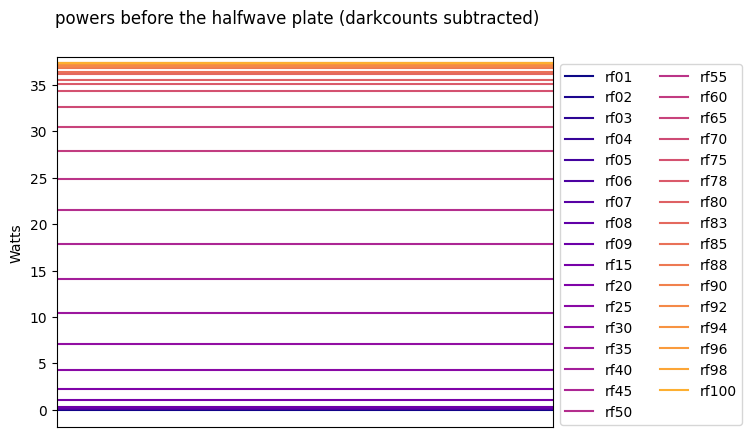

In [76]:
for i, (rf, avg) in enumerate(before_hwp_avg.items()):

    plt.axhline(avg - darkcounts_before_avg, label=rf, color = colors[i])
    plt.legend(ncol= 2, bbox_to_anchor = (1,1))
    plt.ylabel('Watts')
    plt.suptitle('powers before the halfwave plate (darkcounts subtracted)')
    
    #x ticks off
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off   

In [77]:
def cdf(x, A, B, C):
    res  =  C * scipy.stats.norm(A,B).cdf(x)
    return res

In [78]:
x_fit = np.linspace(0, 100, 100)

fitted params 46.74041416656033 18.7518123303732 37.19382494418946


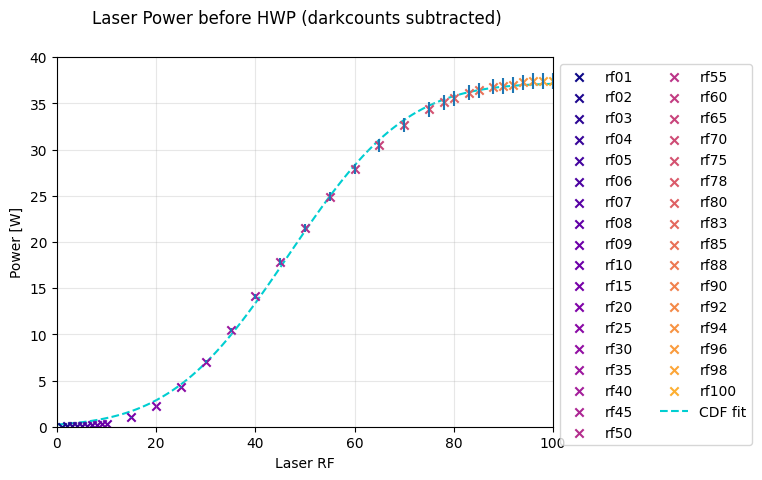

In [79]:
x = []
y = []

for i, (rf, avg) in enumerate(before_hwp_avg.items()):
    plt.scatter(int(rf[2:]), avg - darkcounts_before_avg, color = colors[i], label = rf, marker='x')
    x.append(float(rf[2:]))
    y.append(avg - darkcounts_before_avg)
    plt.errorbar(x=int(rf[2:]), y=avg - darkcounts_before_avg, yerr=error[i], fmt='none')
    if i == 8:
        plt.scatter(10, before_hwp_rf10, color = colors[i], marker='x', label = 'rf10')

#add data for rf10 before hwp
x.append(10)
y.append(rf10_before - darkcounts_before_avg)

plt.xlabel('Laser RF')
plt.ylabel('Power [W]')
plt.suptitle("Laser Power before HWP (darkcounts subtracted)")
# mu, sigma, amp = curve_fit(f = cdf, xdata = x, ydata = avg - darkcounts_before_avg, p0=[50, 20, 40])[0]
mu, sigma, amp = curve_fit(f = cdf, xdata = x, ydata = y, p0=[50, 18, 35])[0]
plt.plot(x_fit, cdf(x_fit, mu, sigma, amp), color ='darkturquoise', zorder = -2, linestyle = 'dashed', label = 'CDF fit')
plt.legend(ncol = 2, bbox_to_anchor = (1,1))

print('fitted params', mu, sigma, amp)

plt.xlim(0,100)
plt.ylim(0, 40)
plt.grid(which='both', alpha = 0.3)
plt.savefig('results/powersbeforehwp.png', bbox_inches="tight")

In [588]:
# re-saving steps counts
keys_after = list(after_hwp_dict.keys()) 
for i, key in enumerate(keys_after):
    after_hwp_dict[key]['rotor_step'] = after_hwp_dict[key].apply(lambda x: x['rotor_step'].split('[')[1].split(',')[0], axis = 1) #OK!
    after_hwp_dict[key]['rotor_step'] = after_hwp_dict[key]['rotor_step'].apply(lambda x: int(x))

In [589]:
print('keys for accessing the dictionary data for each entry: \n', after_hwp_dict['rf01'].keys())


keys for accessing the dictionary data for each entry: 
 Index(['rotor_step', 'raw_data', 'averaged', 'stdev'], dtype='object')


In [590]:
for i, key in enumerate(keys_after):
    print(f'index: {i}, label: {key}')

index: 0, label: rf01
index: 1, label: rf02
index: 2, label: rf03
index: 3, label: rf04
index: 4, label: rf05
index: 5, label: rf06
index: 6, label: rf07
index: 7, label: rf08
index: 8, label: rf09
index: 9, label: rf100
index: 10, label: rf10_left
index: 11, label: rf10_right
index: 12, label: rf15
index: 13, label: rf20
index: 14, label: rf25
index: 15, label: rf30
index: 16, label: rf35
index: 17, label: rf40
index: 18, label: rf45
index: 19, label: rf50
index: 20, label: rf55
index: 21, label: rf60
index: 22, label: rf65
index: 23, label: rf70
index: 24, label: rf75
index: 25, label: rf80
index: 26, label: rf85
index: 27, label: rf90
index: 28, label: rf92
index: 29, label: rf94
index: 30, label: rf96
index: 31, label: rf98


In [591]:
darkcount_after_avg = np.average(darkcounts['averaged'])
print('darkcount', darkcount_after_avg)
print('the stdev is 10 times smaller -- so it\'s pretty signi', np.average(after_hwp_dict[keys_after[17]]['stdev']))

darkcount -0.03452952076913785
the stdev is 10 times smaller -- so it's pretty signi 0.13680750293234561


rf98 - fitted parameters: A=0.1953392088700997, B=0.0006976592894753675, C=0.7764768986021551, D=0.19495002338353748
- min val of fit:  -0.000312668028748575
-- at step :  5500.0
fitted parameters: [1.95339209e-01 6.97659289e-04 7.76476899e-01 1.94950023e-01]
period is 9006.094238212576
0.39304649390202634
before 10 avg calculated 0.3156570279455703


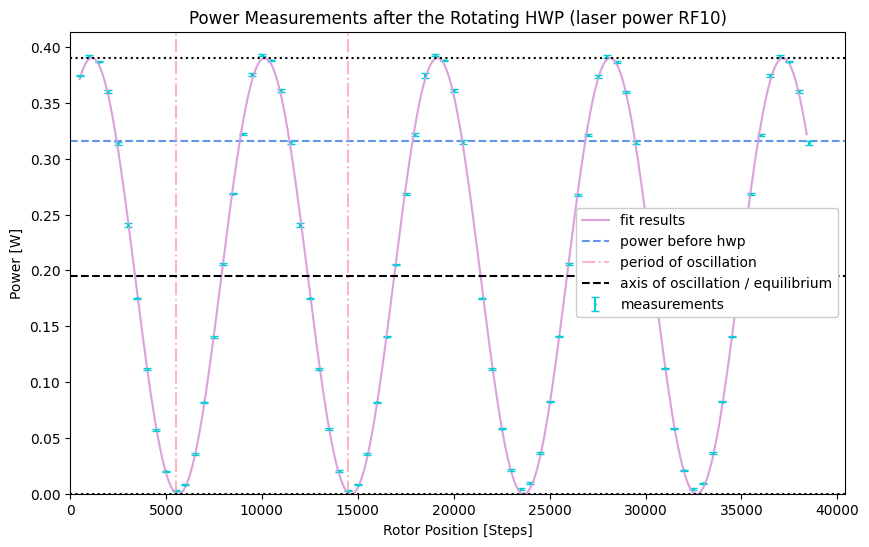

In [592]:
# rf10 plot over long range

fig, ax = plt.subplots(1,1, figsize =  (10,6))
ax.set_title('Power Measurements after the Rotating HWP (laser power RF10)')
ax.set_ylabel('Power [W]')
ax.set_xlabel('Rotor Position [Steps]')


# JOIN THE DATA FOR LEFT AND RIGHT MEASUREMENT


vals = np.array([])
steps = np.array([])
errors  = np.array([])

for key in keys_after:
    if (key == 'rf10_left') or (key == 'rf10_right'):
        data = after_hwp_dict[key]

        steps = np.append(steps, np.array(data['rotor_step'][1:]))
        vals = np.append(vals, np.array(data['averaged'][1:]))
        errors = np.append(errors, np.array(data['stdev'][1:]))

# subtract darkcount
vals -= darkcount_after_avg

# fit and winned info
params, fitsteps, y_fit = fitter(steps, vals, p0_amp = max(vals), label=key)
print('- min val of fit: ' , min(y_fit))
xmin =  fitsteps [np.where(y_fit < min(y_fit)+ 0.001)[0][0] ]
print('-- at step : ', xmin)


print(f'fitted parameters: {params}')
print('period is', 2*np.pi/ params[1])
plt.errorbar(x=steps, y=vals, yerr = errors, fmt = 'o' ,markersize=1, capsize=3 , color ='darkturquoise', label = 'measurements')
plt.plot(fitsteps, y_fit, color = 'plum', label = 'fit results', alpha = 1)

maxval = max(vals)
print(maxval)
beforehwp_rf10_avg = maxval * ratio_darkcount_to_max
print('before 10 avg calculated', beforehwp_rf10_avg)
ax.axhline(beforehwp_rf10_avg, color ='cornflowerblue', label = 'power before hwp', linestyle = 'dashed', zorder = -2)

# draw in important parameters
ax.axvline(xmin, linestyle = 'dashdot', color ='lightpink')
ax.axvline(xmin +2*np.pi/ params[1], linestyle = 'dashdot' , label ='period of oscillation', color ='lightpink')
ax.axhline(params[3], label = 'axis of oscillation / equilibrium', linestyle = 'dashed', color = 'black')
ax.axhline(params[3] - params[0], linestyle = 'dotted', color = 'black')
ax.axhline(params[3] + params[0], linestyle = 'dotted', color = 'black')



plt.xlim(left = 0)
plt.ylim(bottom = 0)
plt.legend(framealpha = 1)
plt.savefig('results/rf10longrange.png')

# After HWP - fits

In [594]:
# sort and clean databank

# deleting useless randos

del after_hwp_dict['rf10_right']
del after_hwp_dict['rf10_left']

# sorting
keys = sorted(after_hwp_dict.keys(), key=rfsort)
print(keys)

temp_dict = {}
for key in keys:
    if len(key) == 3:
        newkey = 'rf0' + key.split('rf')[1]
        temp_dict[newkey] = after_hwp_dict[key]
    else:
        temp_dict[key] = after_hwp_dict[key]

after_hwp_dict = temp_dict
print('\nkeys after adjusting name length: ', after_hwp_dict.keys())

['rf01', 'rf02', 'rf03', 'rf04', 'rf05', 'rf06', 'rf07', 'rf08', 'rf09', 'rf15', 'rf20', 'rf25', 'rf30', 'rf35', 'rf40', 'rf45', 'rf50', 'rf55', 'rf60', 'rf65', 'rf70', 'rf75', 'rf80', 'rf85', 'rf90', 'rf92', 'rf94', 'rf96', 'rf98', 'rf100']

keys after adjusting name length:  dict_keys(['rf01', 'rf02', 'rf03', 'rf04', 'rf05', 'rf06', 'rf07', 'rf08', 'rf09', 'rf15', 'rf20', 'rf25', 'rf30', 'rf35', 'rf40', 'rf45', 'rf50', 'rf55', 'rf60', 'rf65', 'rf70', 'rf75', 'rf80', 'rf85', 'rf90', 'rf92', 'rf94', 'rf96', 'rf98', 'rf100'])


In [595]:
colors2 = cmap(np.linspace(0, 1, len(keys) + 8))

the girls with the wings on the far right:
0 rf01


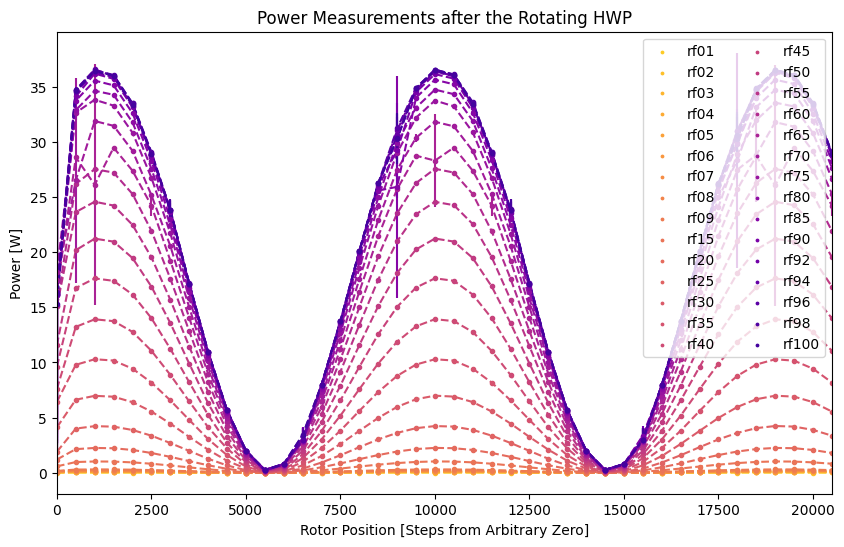

In [596]:
fig, ax = plt.subplots(1,1, figsize =  (10,6))
ax.set_title('Power Measurements after the Rotating HWP')
ax.set_ylabel('Power [W]')
ax.set_xlabel('Rotor Position [Steps from Arbitrary Zero]')

for i, key in enumerate(keys):
    # print(i, key)

    data = after_hwp_dict[key]
    steps = np.array(data['rotor_step'])

    if np.any(steps>30000):
        print('the girls with the wings on the far right:')
        print(i, key)

    vals = data['averaged'] - darkcount_after_avg
    error = np.array(data['stdev'])
    plt.scatter(steps, vals, label = key, color = colors2[-i - 5], s = 3)
    plt.plot(steps, vals,  color = colors2[-i  - 5], linestyle = 'dashed')
    plt.errorbar(x = steps, y = vals, yerr= error, color = colors2[-i-5], markersize = 3, fmt = 'o')


plt.legend(ncol =2 ,bbox_to_anchor = (1,1), loc=1 )
plt.xlim(0,20500)
# plt.ylim(0)
plt.savefig('results/all_after_at_same_time.png')

In [597]:
# results of the fits - A:amp, B:wavenum, C:phase_shift, D:offset
fit_params_results = np.zeros((len(after_hwp_dict), 4), dtype=float)

!!YO!! index 0, key: rf01
rf01 - fitted parameters: A=7.518339442120142e-05, B=0.0005933594090776436, C=3.406661751035975, D=-0.03401615918379423


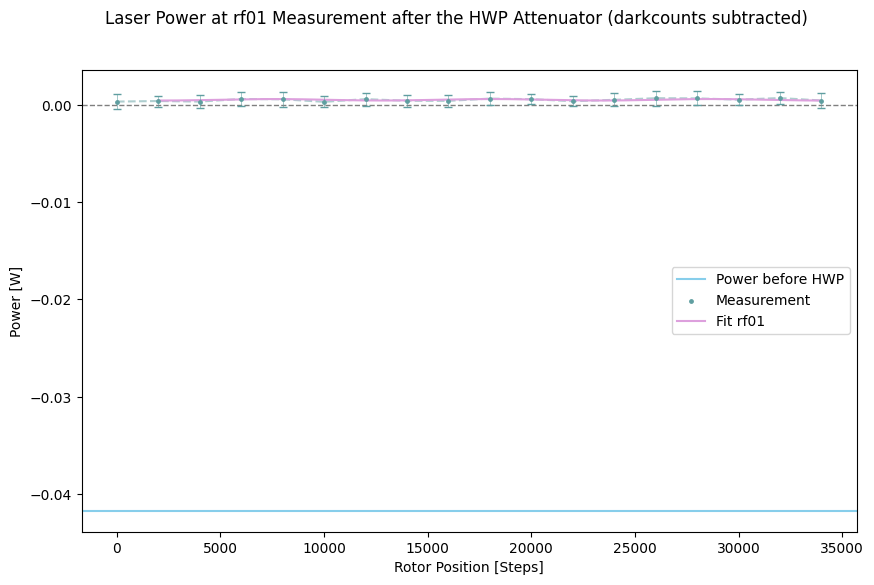

!!YO!! index 1, key: rf02
rf02 - fitted parameters: A=0.037831317261265124, B=0.0006991433913095518, C=0.7701875962928475, D=0.00700765678296687


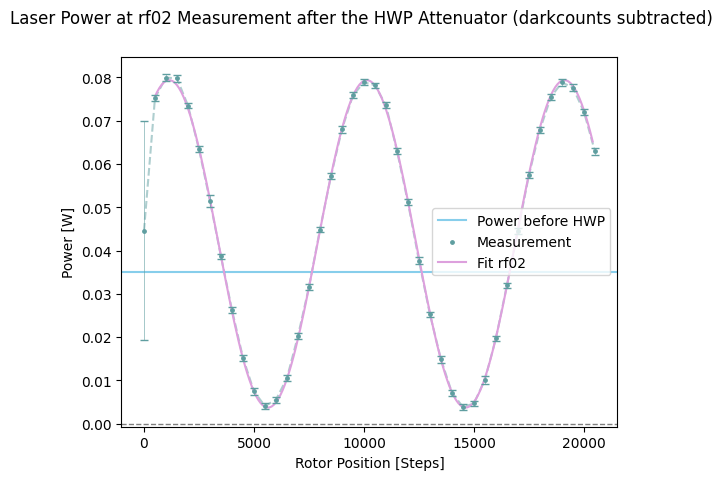

!!YO!! index 2, key: rf03
rf03 - fitted parameters: A=0.03804390988984928, B=0.000698359288448811, C=0.7757070904236262, D=0.005326567605560708


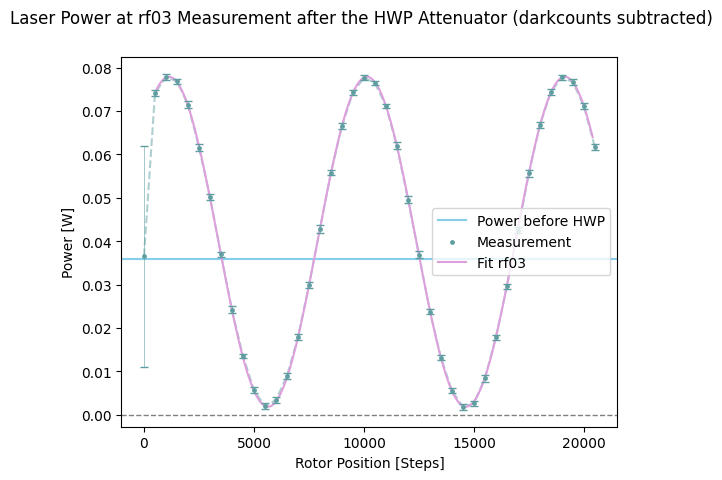

!!YO!! index 3, key: rf04
rf04 - fitted parameters: A=0.03928035184466624, B=0.0006978591612965668, C=0.7906782961771522, D=0.006940288594564959


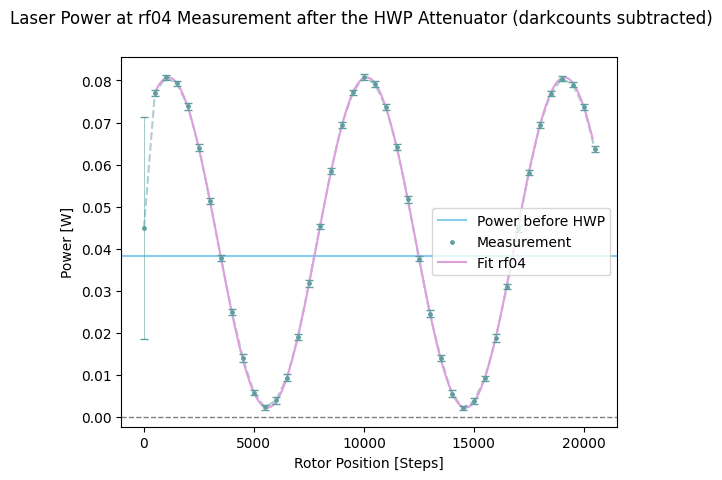

!!YO!! index 4, key: rf05
rf05 - fitted parameters: A=0.05371892723684034, B=0.0006979637977887489, C=0.7813273885837181, D=0.020235676944434178


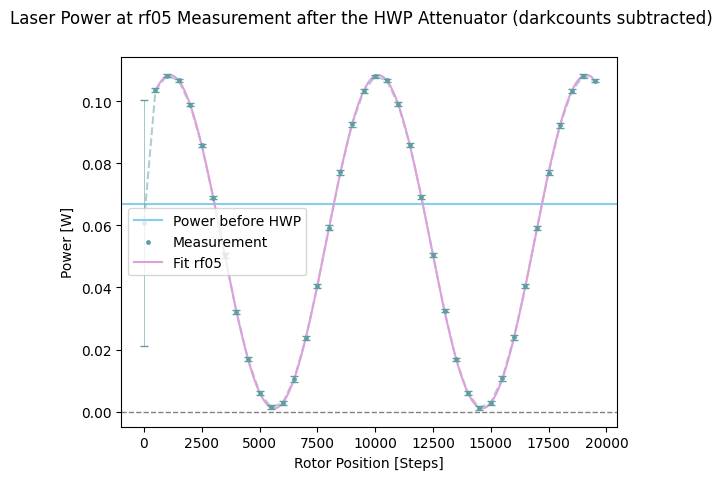

!!YO!! index 5, key: rf06
rf06 - fitted parameters: A=0.0706054316790939, B=0.0006981102036337647, C=0.778305840728361, D=0.03750592542126659


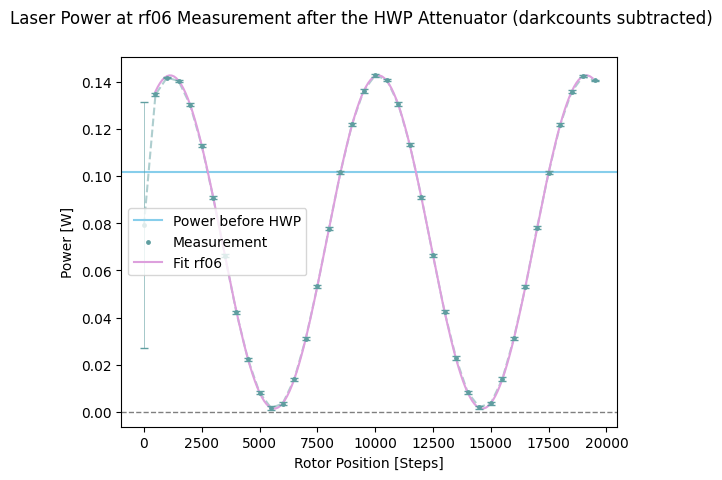

!!YO!! index 6, key: rf07
rf07 - fitted parameters: A=0.09212469282528613, B=0.0006980425308408753, C=0.7802838750634548, D=0.05910561446431206


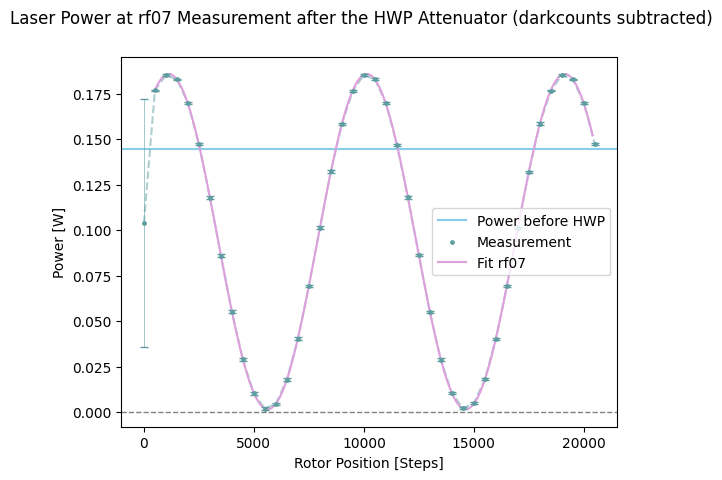

!!YO!! index 7, key: rf08
rf08 - fitted parameters: A=0.11810536873258366, B=0.0006981977003288577, C=0.7752550185311904, D=0.08540474074558409


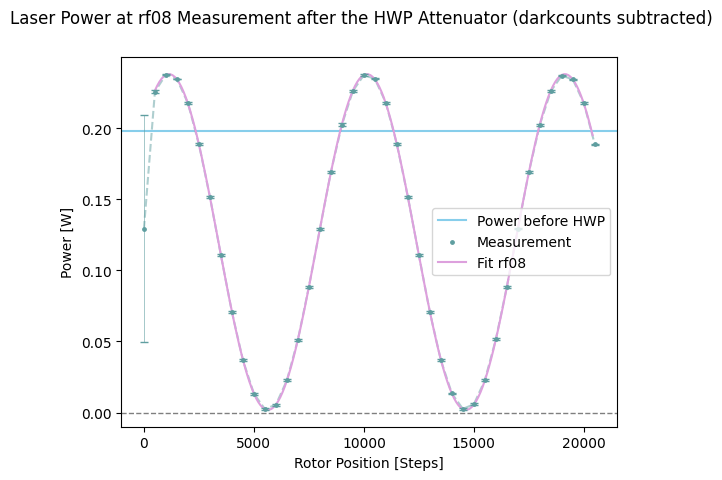

!!YO!! index 8, key: rf09
rf09 - fitted parameters: A=0.1498575844439466, B=0.0006980078373937582, C=0.7797386701107906, D=0.11733308877199693


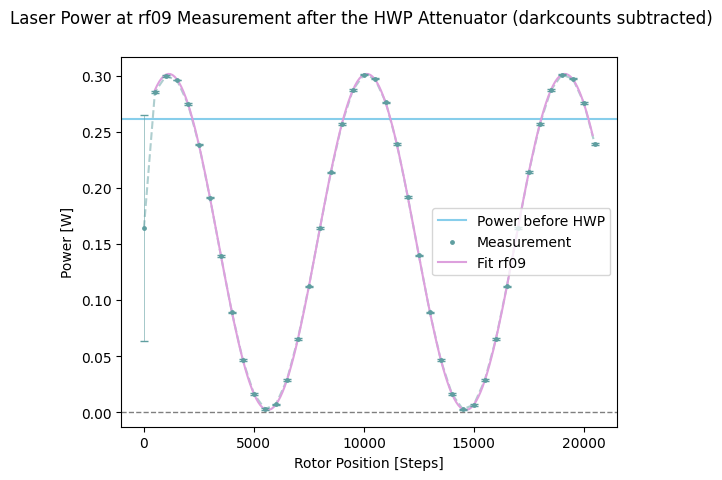

!!YO!! index 9, key: rf15
rf15 - fitted parameters: A=0.5107060388968993, B=0.0006985675367481983, C=0.7686131732991268, D=0.482362653867208


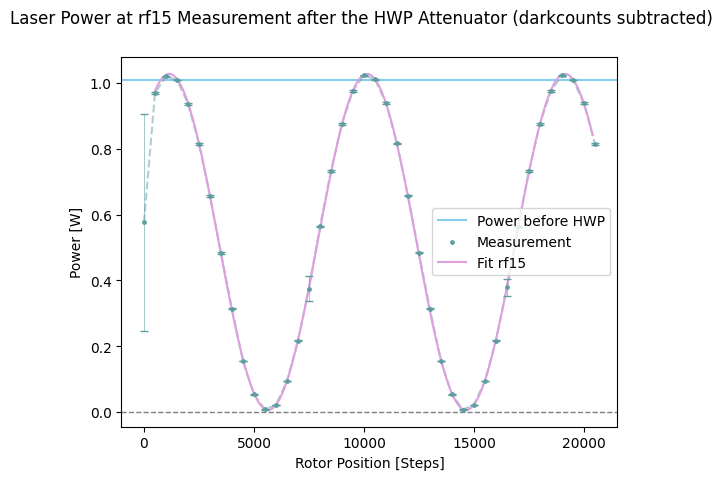

!!YO!! index 10, key: rf20
rf20 - fitted parameters: A=1.1217356344568699, B=0.0006983082994947185, C=0.7744295417864109, D=1.102134569080162


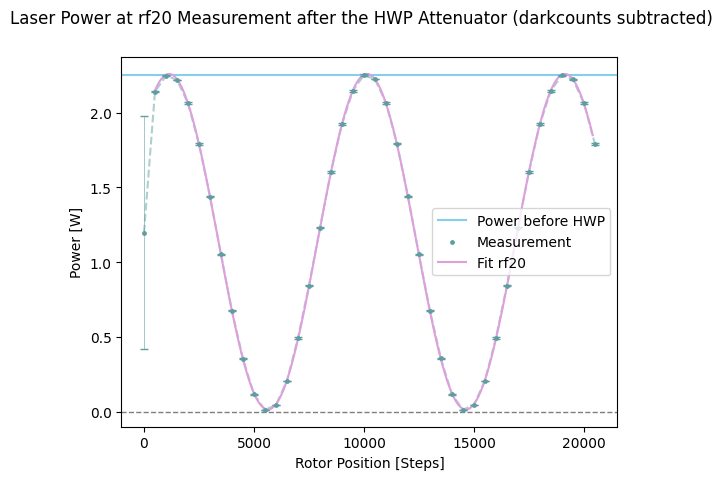

!!YO!! index 11, key: rf25
rf25 - fitted parameters: A=2.1114929854003583, B=0.0006983404969842004, C=0.7751081422779479, D=2.1014316941814886


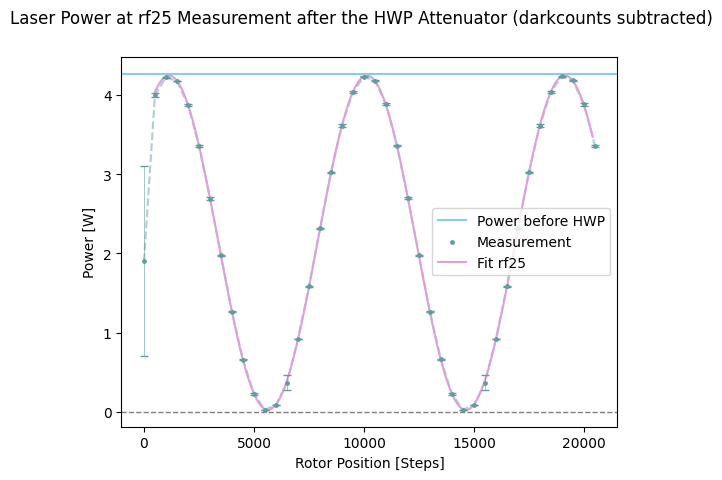

!!YO!! index 12, key: rf30
rf30 - fitted parameters: A=3.4817430684807578, B=0.0006982132164952087, C=0.7759121796670393, D=3.489802669486712


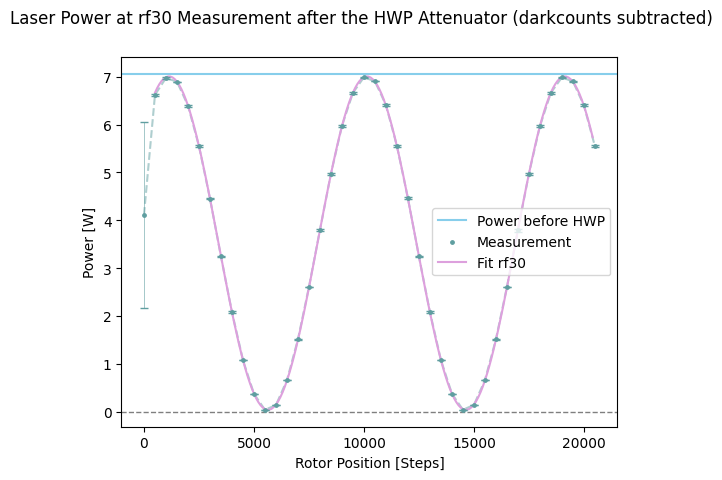

!!YO!! index 13, key: rf35
rf35 - fitted parameters: A=5.134427993265134, B=0.0006981761133635927, C=0.7763238350745744, D=5.156194164351514


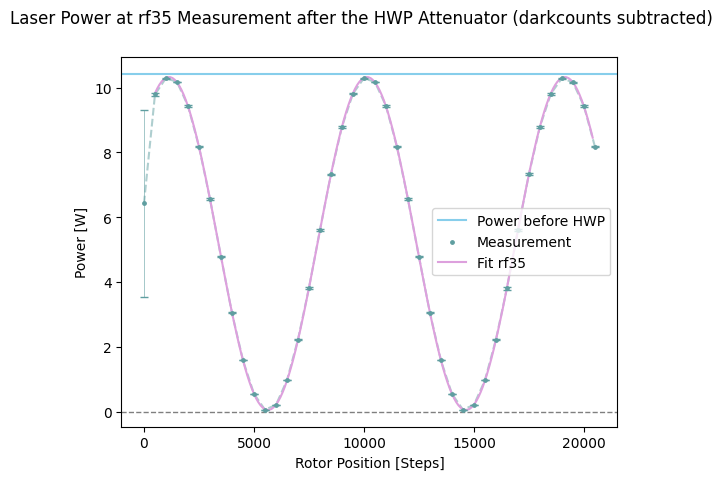

!!YO!! index 14, key: rf40
rf40 - fitted parameters: A=6.939872463296968, B=0.0006981788297290032, C=0.7762447272934923, D=6.986837391176248


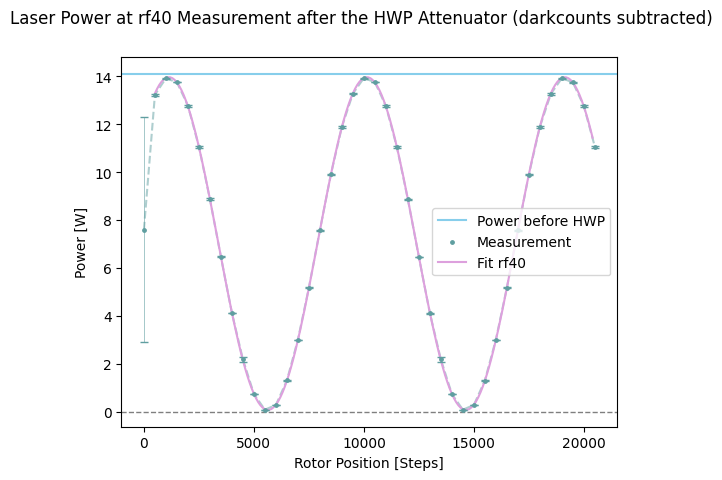

!!YO!! index 15, key: rf45
rf45 - fitted parameters: A=8.798815889909816, B=0.0006982799599342002, C=0.775031480879619, D=8.848437378951115


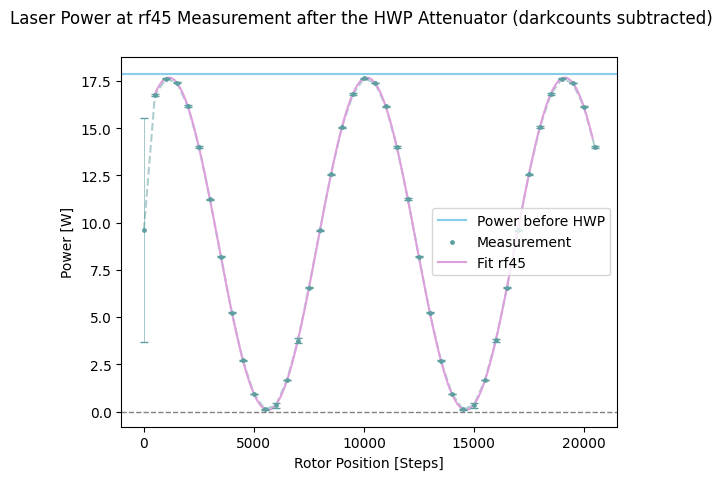

!!YO!! index 16, key: rf50
rf50 - fitted parameters: A=10.593700271246764, B=0.0006981979747690287, C=0.7757345966987531, D=10.674405631545708


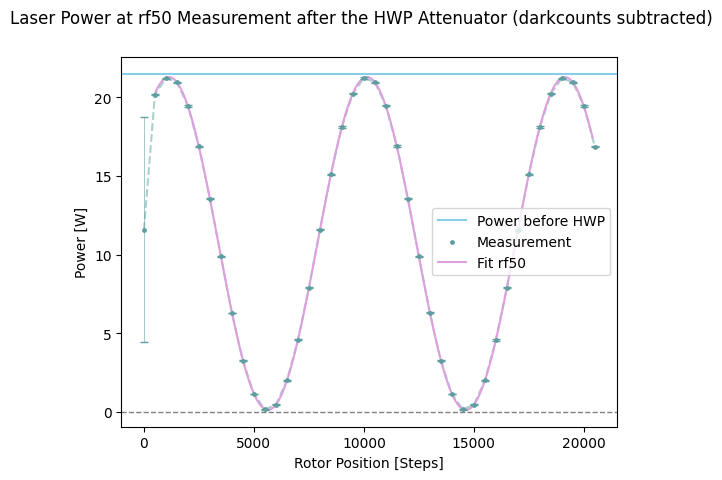

!!YO!! index 17, key: rf55
rf55 - fitted parameters: A=12.26887690054658, B=0.0006979551781997615, C=0.7796822967708814, D=12.375174134239622


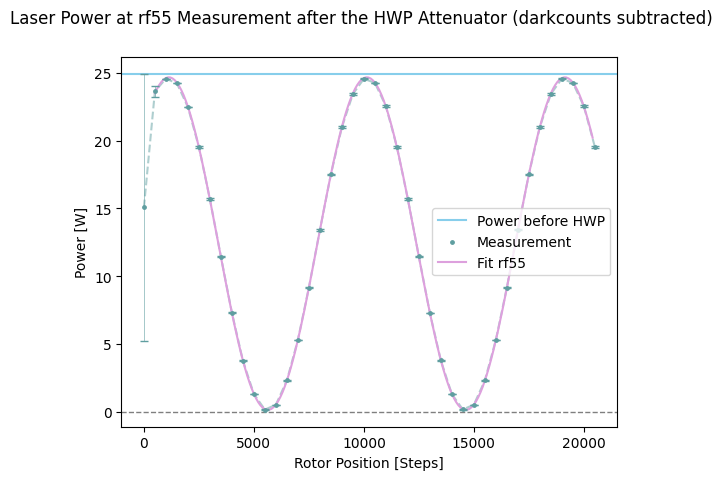

!!YO!! index 18, key: rf60
rf60 - fitted parameters: A=13.746444880756442, B=0.0006983144828505051, C=0.7749087530388019, D=13.870517604343217


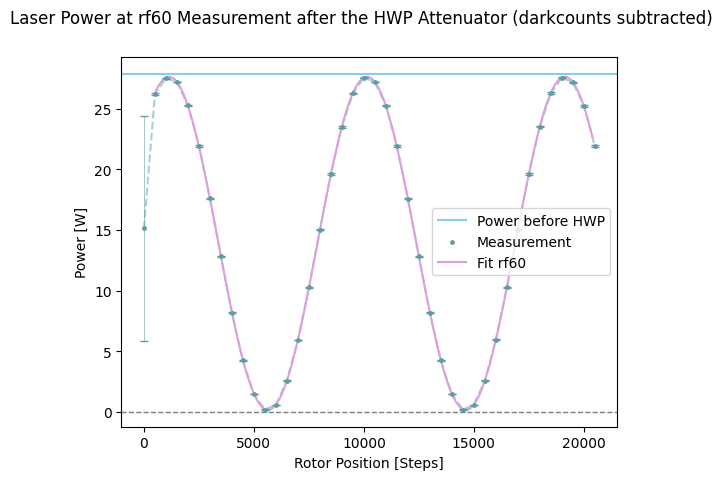

!!YO!! index 19, key: rf65
rf65 - fitted parameters: A=14.573549107772644, B=0.0006989484650860784, C=0.7624896969752625, D=14.944625129902349


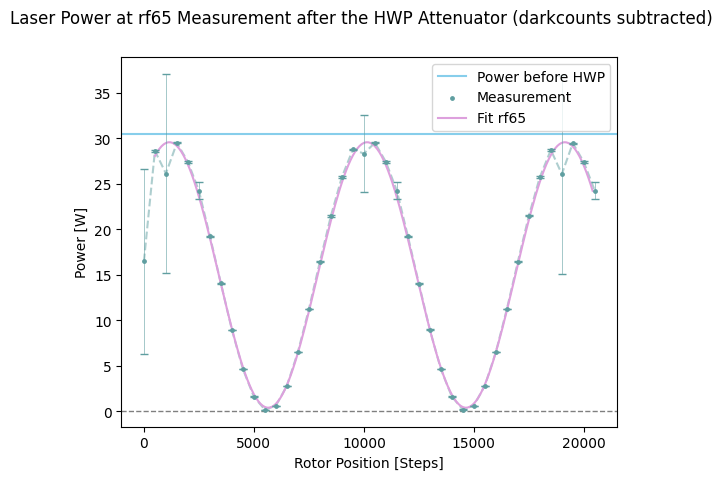

!!YO!! index 20, key: rf70
rf70 - fitted parameters: A=15.691159347075057, B=0.0007002217848439881, C=0.7487789346118027, D=15.965956160757418


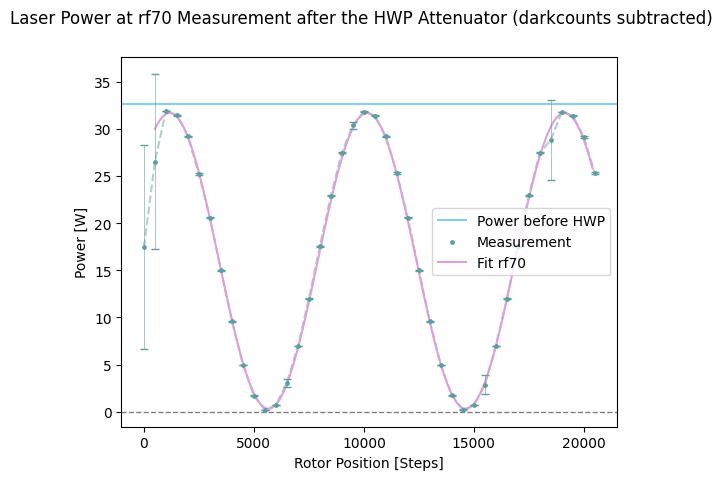

!!YO!! index 21, key: rf75
rf75 - fitted parameters: A=16.856761372966055, B=0.0006982600645638572, C=0.7773272344882654, D=17.001076943033322


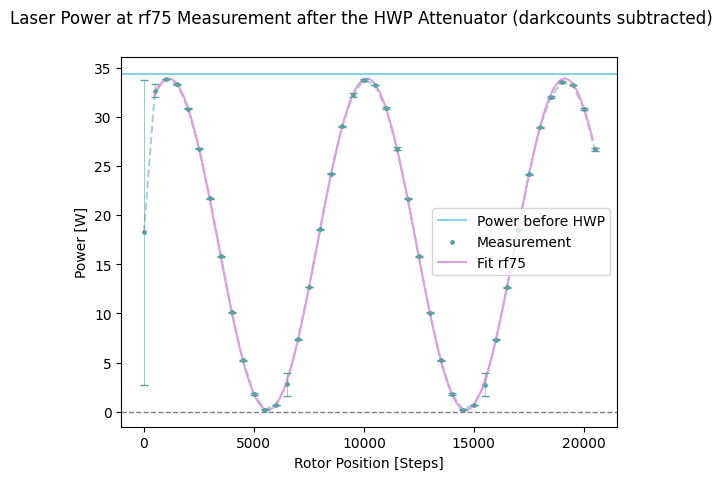

!!YO!! index 22, key: rf80
rf80 - fitted parameters: A=17.305645343374977, B=0.000697866644548474, C=0.7755314183263539, D=17.5173970173349


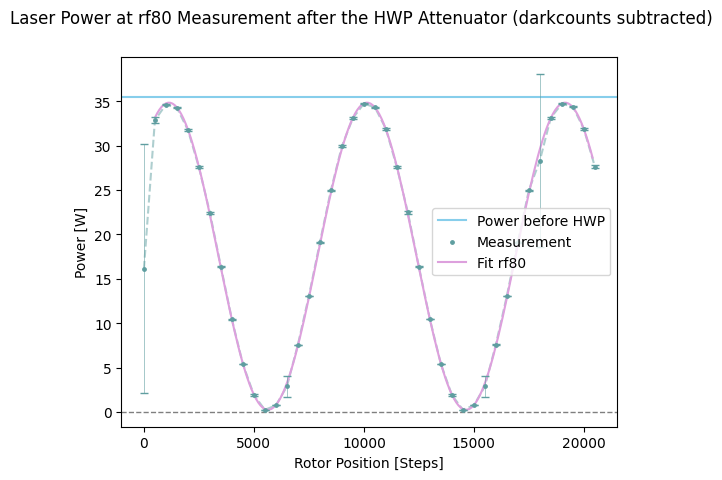

!!YO!! index 23, key: rf85
rf85 - fitted parameters: A=17.633107974281128, B=0.0006992397584107097, C=0.7534846366967248, D=17.85549087559871


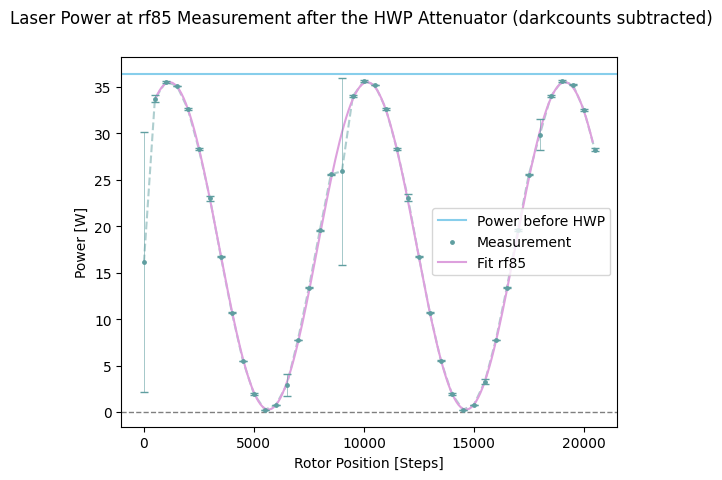

!!YO!! index 24, key: rf90
rf90 - fitted parameters: A=17.967443134710933, B=0.000698636098896899, C=0.7637641717121656, D=18.206957135800497


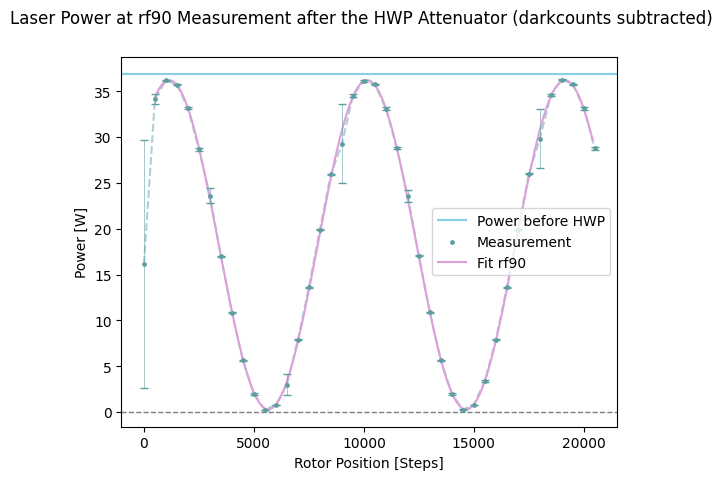

!!YO!! index 25, key: rf92
rf92 - fitted parameters: A=18.15940512565378, B=0.0006987232301884639, C=0.7675119178287264, D=18.35391749412806


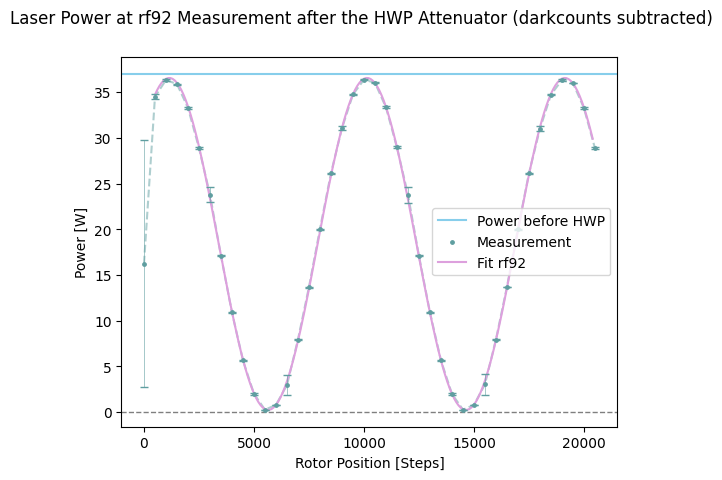

!!YO!! index 26, key: rf94
rf94 - fitted parameters: A=18.189886136953014, B=0.0006987677795494126, C=0.7677848694128581, D=18.36695698915042


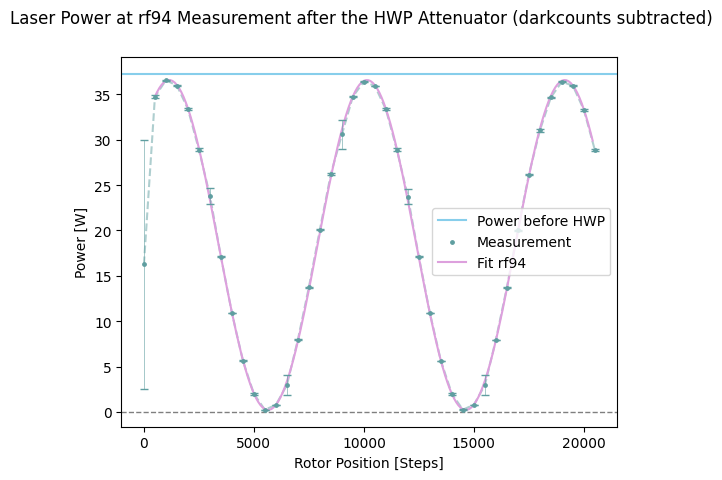

!!YO!! index 27, key: rf96
rf96 - fitted parameters: A=18.230117196084812, B=0.0006984204933080134, C=0.7693602078986685, D=18.428984710839256


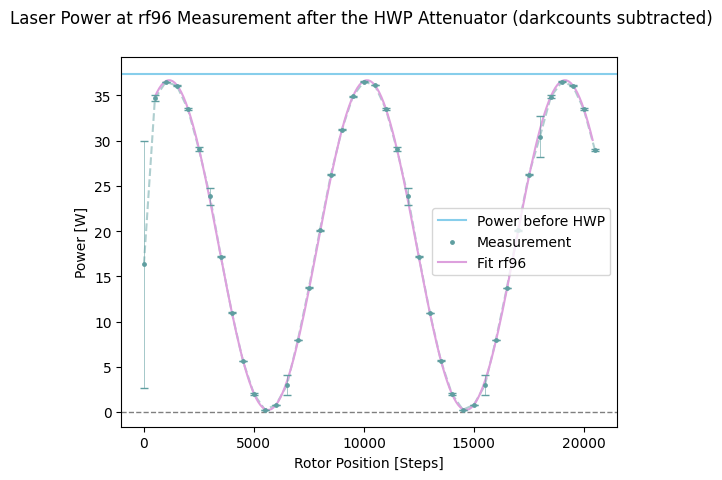

!!YO!! index 28, key: rf98
rf98 - fitted parameters: A=18.1709887797168, B=0.0006982724406999415, C=0.769225885218902, D=18.411403601878284


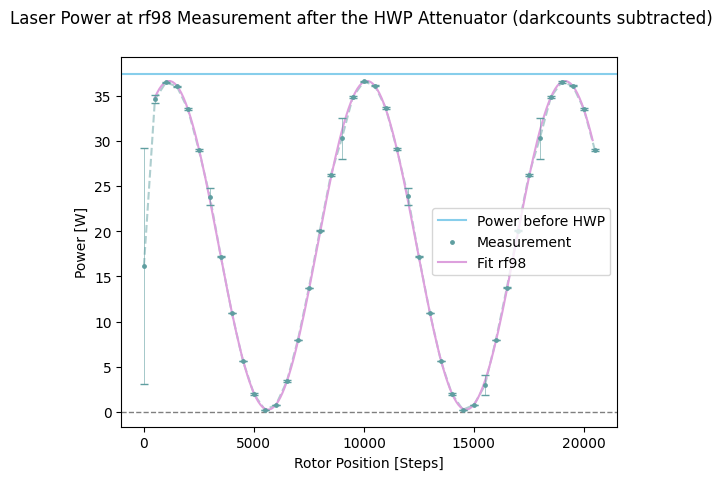

!!YO!! index 29, key: rf100
rf100 - fitted parameters: A=18.17220987642345, B=0.0006983572987462047, C=0.7707095515949626, D=18.402447739258406


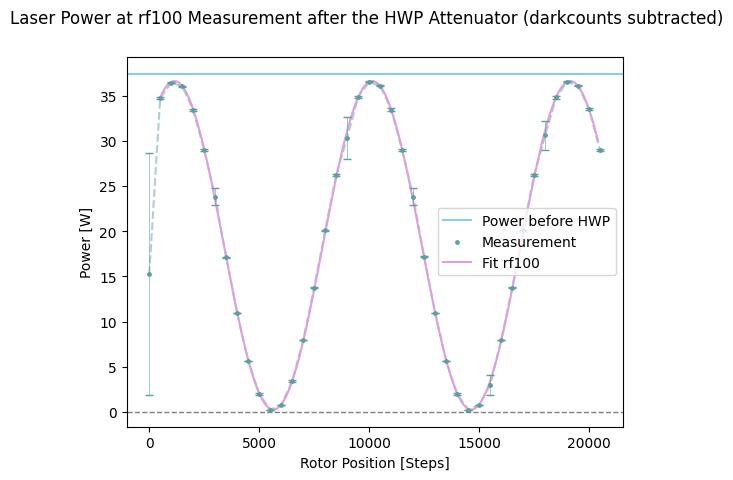

<Figure size 640x480 with 0 Axes>

In [601]:
fig, ax = plt.subplots(1,1, figsize =  (10,6))


for i, key in enumerate(after_hwp_dict.keys()):
    print(f'!!YO!! index {i}, key: {key}')
    data = after_hwp_dict[key]
    steps = np.array(data['rotor_step'])
    vals = data['averaged']
    error = np.array(data['stdev'])

    params, fitsteps, y_fit = fitter(steps[1:], vals[1:], p0_amp = max(vals), label=key) #miss that first step it's messed up
    fit_params_results[i] = params

    # plot level before HWP
    try: # dkc suubtracted
        plt.axhline(before_hwp_avg[key] - darkcounts_before_avg, label = f'Power before HWP', color = 'skyblue')
    except KeyError:
        print(f'{key} isnt measured at before hwp')

    # dkc subtracted
    plt.scatter(steps , vals - darkcount_after_avg, label = 'Measurement', color = 'cadetblue', marker = 'o', s= 6,  zorder = 3)
    plt.plot(steps , vals - darkcount_after_avg, color = 'cadetblue', linestyle = 'dashed', alpha = 0.5)
    plt.plot(fitsteps, y_fit - darkcount_after_avg, color = 'plum', label = f'Fit {key}', alpha = 1, zorder = 2)
    plt.errorbar(x = steps, y = vals - darkcount_after_avg, yerr= error, fmt = 'none', elinewidth=.4, markersize = 1, capsize =3 , color = 'cadetblue', zorder =3)



    #formatting
    plt.suptitle(f'Laser Power at {key} Measurement after the HWP Attenuator (darkcounts subtracted)')
    plt.ylabel('Power [W]')
    plt.xlabel('Rotor Position [Steps]')

    plt.axhline(0, linestyle = 'dashed',  color = 'black', linewidth = 1, alpha = 0.5)

    plt.legend()
    plt.show()
    plt.savefig(f'results/separated_fits/{key}.png')

In [602]:
fit_params_results[:,1] = 2 *np.pi / fit_params_results[:,1]

In [607]:
for i,param in enumerate(['amp','period', 'phase shfit', 'offset']):
    avg = np.average(fit_params_results[4:,i])
    std = np.std(fit_params_results[4:,i])
    print(f'{param} is {avg} +- {std}')

amp is 9.851634674084115 +- 7.410412730025884
period is 8996.463424627416 +- 6.164806090946131
phase shfit is 0.7720333863295713 +- 0.007773002398589064
offset is 9.956234489817392 +- 7.518906756258998
